## **Cost Analysis**

In [1]:
!pip install -r requirements.txt

In [2]:
#Importing
%pip install python-gnupg
%pip install eep153_tools
%matplotlib inline
import pandas as pd
import numpy as np
import eep153_tools
import cfe
from cfe import Regression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from Nutrient_Demands import ugd8_result as uga
from Nutrient_Demands import ugd_rdi, nutrient_demand

In [4]:
from Nutrient_Demands import pbar, my_prices

In [5]:
import numpy as np

xhat = uga.predicted_expenditures()

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
x0 = xbar.quantile(0.5)  # Household at 0.5 quantile is median

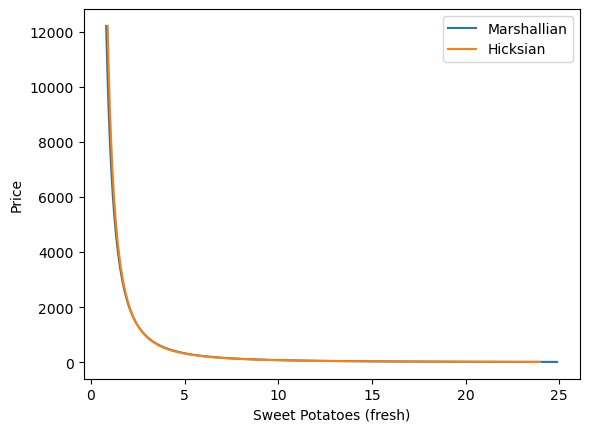

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

my_j = 'Sweet Potatoes (fresh)'  # Interesting Ugandan staple

P = np.geomspace(.01,10,50)*pbar[my_j]

# Utility of median household, given prices
U0 = uga.indirect_utility(x0,pbar)

plt.plot([uga.demands(x0,my_prices(my_j,p0))[my_j] for p0 in P],P)
plt.plot([uga.demands(U0,my_prices(my_j,p0),type="Hicksian")[my_j] for p0 in P],P)
plt.ylabel('Price')
plt.xlabel(my_j)
plt.legend(("Marshallian","Hicksian"))

In [8]:
def compensating_variation(U0,p0,p1):
    #minimum utility with prices p0
    x0 = uga.expenditure(U0,p0)
    #minimum utility with prices p1
    x1 = uga.expenditure(U0,p1)

    return x1-x0

def revenue(U0,p0,p1,type='Marshallian'):
    """(Un)Compensated revenue from taxes changing vector of prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    
    dp = p1 - p0 # Change in prices

    c = uga.demands(U0,p1,type=type) # Demand at new price

    dp,c = dp.align(c,join='inner')

    return dp.T@c # Change in price times demand of new price


def deadweight_loss(U0,p0,p1):
    """
    Deadweight loss of tax/subsidy scheme creating wedge in prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    cv = compensating_variation(U0,p0,p1) # Consumer surplus, trapezoid we graphed

    return cv - revenue(U0,p0,p1,type='Hicksian') # Subtract revenue

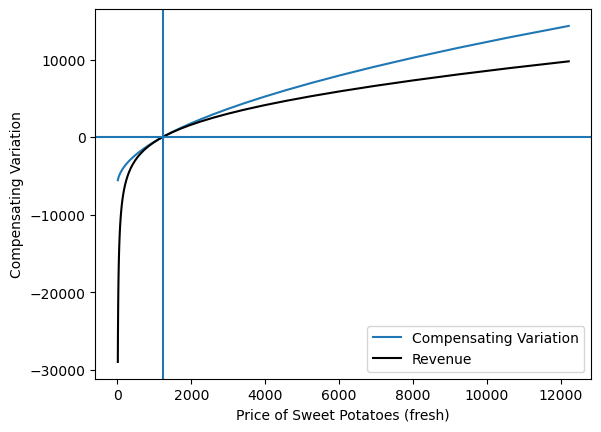

In [9]:
fig, ax1 = plt.subplots()

ax1.plot(P,[compensating_variation(U0,pbar,my_prices(my_j,p0)) for p0 in P])
ax1.set_xlabel(f"Price of {my_j}")
ax1.set_ylabel("Compensating Variation")

ax1.plot(P,[revenue(U0,pbar,my_prices(my_j,p0),type='Hicksian') for p0 in P],'k')
ax1.legend(('Compensating Variation','Revenue'))
ax1.axhline(0)
ax1.axvline(pbar.loc[my_j])

Text(0, 0.5, 'Deadweight Loss')

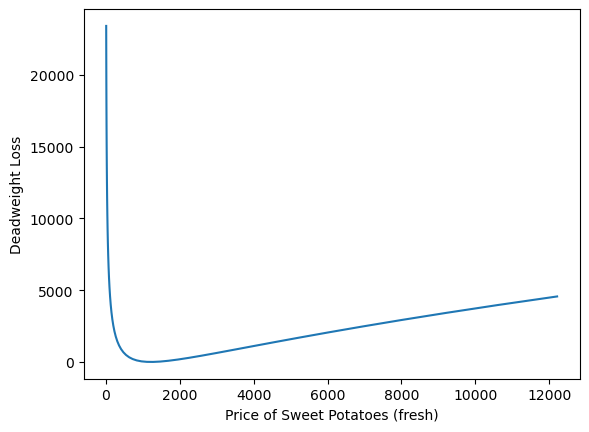

In [10]:
fig, ax1 = plt.subplots()

ax1.plot(P,[deadweight_loss(U0,pbar,my_prices(my_j,p0)) for p0 in P])
ax1.set_xlabel("Price of %s" % my_j)
ax1.set_ylabel("Deadweight Loss")